## Load in modules

In [1]:
import jwstniriss as jw
import numpy as np #numpy gives us better array management 

## Load plotting modules

In [2]:
import matplotlib  #ploting
#matplotlib.use("Agg")  #some hack to stop the bouncing python icon when plotting
import matplotlib.pyplot as plt
#next line is to show plots inline with jupyter
#%matplotlib inline 
from matplotlib.colors import LogNorm #for better display of FITS images

## Enable Inline plotting

In [3]:
%matplotlib inline

## Show documentation for each routines

In [4]:
jw.read_datacube.__doc__

'Usage scidata = datacube(filename)'

In [5]:
jw.r2s.__doc__

'Usage: zpt,slope,image=r2s(scidata)'

In [6]:
jw.apertureflux.__doc__

'flux=jw.apertureflux(scidata,tr,20,0) - Extract Flux using simple Aperture'

In [7]:
jw.tracespec.__doc__

'tr, trpsf = jw.tracespec(image)  - Finds trace of spectral orders'

## Read in a datacube

In [8]:
connection = 'local' # local or remote

# From a remote server :
import paramiko
import sys
import os
import getpass
import socket


## Remote data ##

if connection == 'remote':
    
    machine = input('Enter machine name for connection: ')
    machine = machine + '.astro.umontreal.ca'
    print('Remote connection at',machine)
#     print('***May be infinitely long if you don\'t have ethernet connection!')
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())

    enterUser = input('Enter username for remote connection to ' + machine + ' : ')
    enterPswd = getpass.getpass('Password:')
    ssh.connect(machine,port=5822,username=enterUser,password = enterPswd)
    del enterPswd
    del enterUser
    print('Connected to',machine)


    sftp_client = ssh.open_sftp()
    remote_file = sftp_client.open('/home/adb/SOSS/wasp-69.fits')
#     remote_file = sftp_client.open('/home/adb/SOSS/cube-700-CLR.fits')

#     print('Reading datacube...')
    scidata=jw.read_datacube(remote_file)
    sftp_client.close()
    ssh.close()
    print('Connections are now closed.')

    
## Local data ##

else :
    print('local fits file')
#     scidata=jw.read_datacube('/Users/antoinedb/SOSS/sample/cube-700-CLR.fits')
    scidata=jw.read_datacube('/Users/antoinedb/SOSS/data/wasp-69/wasp-69.fits')
    print('Done reading')
    
    
    
    

if np.shape(scidata)[1:3] == (256, 2048):
    scidata = np.swapaxes(scidata,1,2)
#     scidata[1] = np.reverse(scidata[1])
    print('Changed shape :',np.shape(scidata))
#     print('Fliped 2nd axis')
    
elif np.shape(scidata)[1:3] != (2048, 256):
    print('*** WARNING *** : Datacube shape is weird',np.shape(scidata))
    
    
scidata = scidata[0:5,:,:]
np.shape(scidata)

local fits file
datacube shape :  (963, 256, 2048)
Reading datacube...
Done reading
Changed shape : (963, 2048, 256)


(5, 2048, 256)

## Show Raw data

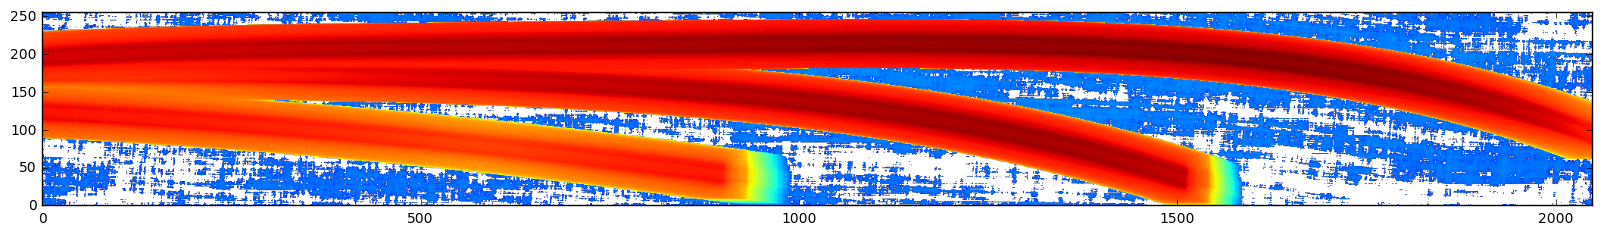

In [9]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(scidata[0,:,:]),norm=LogNorm())
plt.axis((0,scidata.shape[1],0,scidata.shape[2]))
plt.show()

## Fit robust line to ramps to produce image

In [10]:
# zpt,slope,image = jw.r2s(scidata)

image = scidata[0:1,:,:].squeeze()
image.shape

(2048, 256)

## Display background / bias 

In [ ]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(zpt),norm=LogNorm())
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Display corrected Image

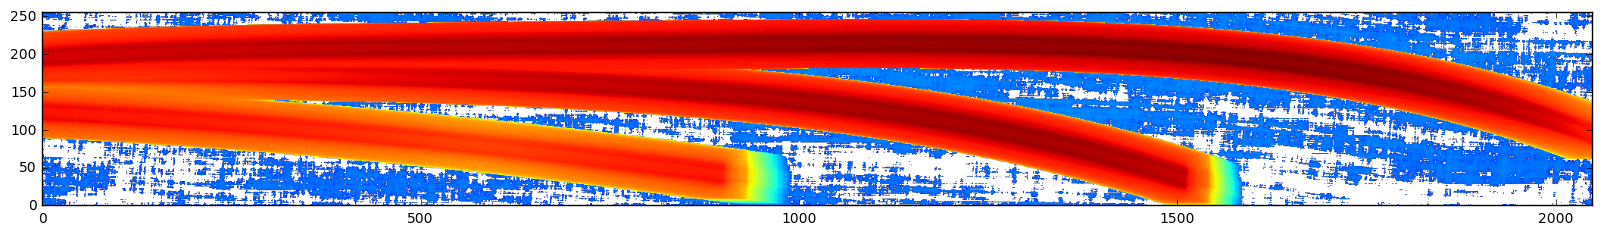

In [11]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(image),norm=LogNorm())
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Extract Trace for n=1

In [12]:
tr, trpsf = jw.tracespec(image) #run the trace program to find the n=1 spectrum
#tr contains the trace for each order, trpsf contains the model parameters from the PSF fit.

size of imput image: (2048, 256)


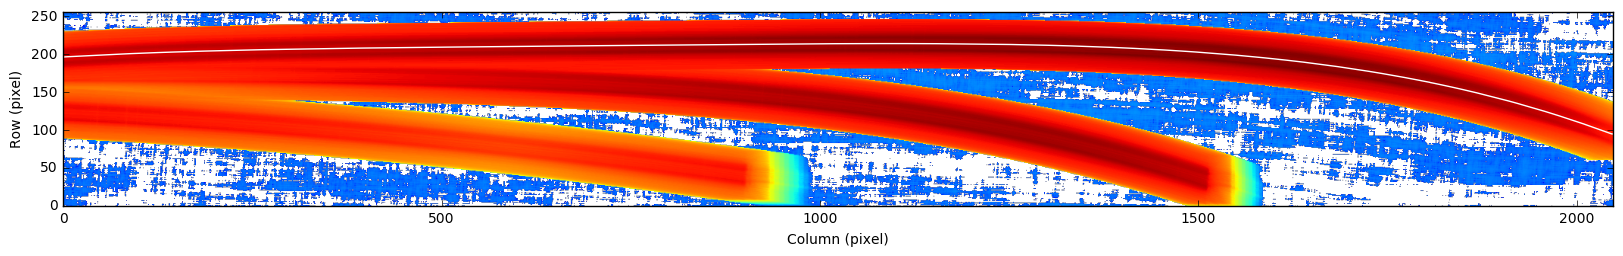

In [13]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(image),norm=LogNorm()) #added log stretch to the plot
#imgplot = plt.colorbar() #add colour bar
plt.plot(tr[:,0],c='w') #overlay trace for n=1
# plt.plot(tr[:,1],c='b') #overlay trace for n=2
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Row (pixel)') #y-label
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Extract Trace With Aperture

In [14]:
flux=jw.apertureflux(image,tr,20,0)  #extract the flux along the trace using a simple aperture

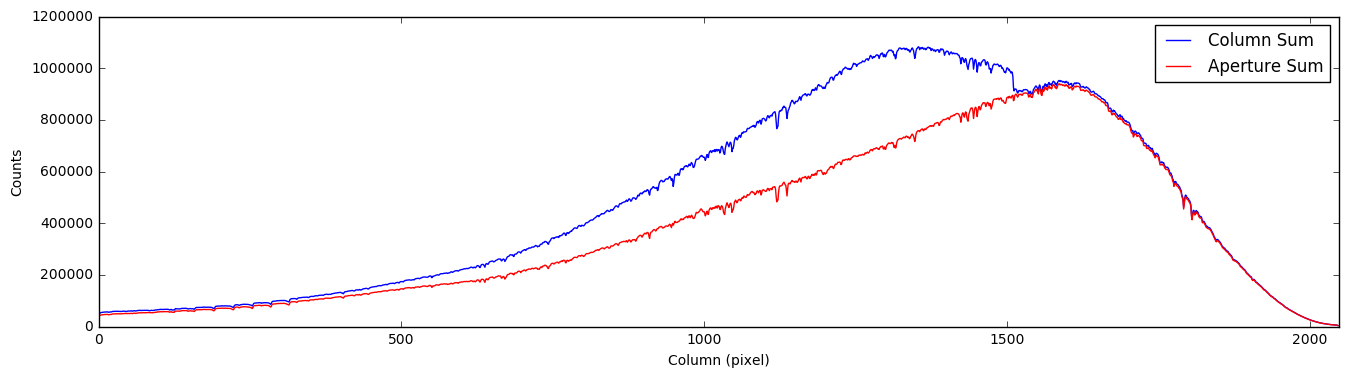

In [15]:
plt.figure(figsize=(16,4)) #adjust size of figure
plt.plot(np.sum(image,axis=1),label='Column Sum') #Plot the sum of each column
plt.plot(flux,c='r',label='Aperture Sum') #Plot the sum of each column
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Counts') #y-label
x1,x2,y1,y2 = plt.axis() 
x1=0
x2=image.shape[0]
y1=0
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.show()